In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

# 1. Import the data in environment 

In [6]:
df = pd.read_excel('/home/vinay/Desktop/work/DATA_SCIENCE/practice_file/case_studies/Call_Center/Call_Centre.xlsx')

In [7]:
df.head()

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Column1
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,False
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,False


In [8]:
## 2.  Make a function to accept the week number and share the below mentioned values of respective week number.
# Total Calls
# Calls Answered
# Avg Speed of Answer
# Abandon Rate
# Avg Call/Min
# Satisfaction Overall
# Calls of Less than 180 Seconds
# % Calls of Less than 180 Seconds
# Satisfaction less than equal to 3


In [9]:
df['Calls'] = 1

In [11]:
df['Answered']=df['Answered (Y/N)'].replace({"Y":1, "N":0})

In [12]:
df['resolved'] = df['Resolved'].replace({"Y":1,"N":0})

In [280]:
# dir(df['Date'].dt)

In [16]:
df['Week'] = df['Date'].dt.week

/home/vinay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [25]:
df['Day'] = df['Date'].dt.day_name()

In [74]:
ls = []
for i in range(df.shape[0]):
    if str(df['AvgTalkDuration'][i]) == "nan":
        ls.append(0)
    else:
        b = str(df['AvgTalkDuration'][i]).split(":")
        ls.append(int(b[0])*(60*60) + int(b[1])*60 + float(b[2]))
df['Seconds'] = ls
df.head()
df[df['Seconds']<180]['Calls'].sum()
# a[0]

880

In [85]:
def weeknumber(week):
    print("Analysis of week ",week)
    dfa = df[df['Week'] == week]
    print("Total calls received : ",dfa['Calls'].sum())
    print("Calls Answered : ",dfa['Answered'].sum())
    print("Average speed of Answer : ",round(df['Speed of Answer'].mean()))
    print("Abandon Rate :",df['Calls'].sum()-df['Answered'].sum())
    print("Average Call per minute : ",df['Calls'].sum()/(8*5*60))
    print("Overall satisfaction : ",df['Satisfaction rating'].mean())
    print("Calls less then 180 seconds :",dfa[dfa['Seconds']<180]['Calls'].sum())
    print("% of Calls less then 180 seocnds :",dfa[dfa['Seconds']<180]['Calls'].sum()/dfa['Calls'].sum()*100)
    print("Satisfaction less then or equal to 3 :",dfa[dfa['Satisfaction rating']<=3]['Calls'].count())
    

In [86]:
weeknumber(1)

Analysis of week  1
Total calls received :  402
Calls Answered :  335
Average speed of Answer :  67
Abandon Rate : 317
Average Call per minute :  0.7383333333333333
Overall satisfaction :  3.4542955326460483
Calls less then 180 seconds : 198
% of Calls less then 180 seocnds : 49.25373134328358
Satisfaction less then or equal to 3 : 165


In [87]:
## 3Make a function to accept agent name and get the below mentioned values of respective agent
# Total Calls
# Calls Answered
# Avg Speed of Answer
# Call Resolution %
# Call Resolved.

In [108]:
def agentname(agent):
    dfa = df[df['Agent']==agent]
    tc = dfa['Calls'].sum()
    ca = dfa['Answered'].sum()
    asa = dfa['Speed of Answer'].mean()
    cr = dfa['resolved'].sum()
    crp = cr/dfa['Calls'].sum()*100
    df1 = pd.DataFrame({"Total_Calls":[tc],"Calls_Answered":[ca],"Avg_Speed_of_Answer":[asa],"Call_Resolution":[cr],"Call_Resolution_%":[crp]})
    return df1

In [111]:
df['Agent'].unique()
agentname("Jim")

,Total_Calls,Calls_Answered,Avg_Speed_of_Answer,Call_Resolution,Call_Resolution_%
0,228,187,66.663102,173,75.877193


In [112]:
## 4. Make a function to accept agent name and get the day (weekday) wise below mentioned values. 
# Total Calls
# Calls Answered
# Avg Speed of Answer
# Call Resolution %
# Call Resolved


In [113]:
df.head()

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Column1,Calls,Answered,resolved,Week,Day,Seconds
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,1,1,1,53,Friday,143.210
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,1,1,0,53,Friday,242.323
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False,1,1,1,53,Friday,131.202
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,False,1,1,1,53,Friday,37.481
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,False,1,1,1,53,Friday,60.083


In [136]:
def daywise(agent):
    dfa= df[df['Agent']==agent]
    tc = dfa.groupby('Day')['Calls'].sum()
    ca= dfa.groupby('Day')['Answered'].sum()
    asa = dfa.groupby('Day')['Speed of Answer'].mean()
    cr = dfa.groupby("Day")['resolved'].sum()
    crp = cr/tc*100
    dc = {"Total_Calls":tc,"Calls_Answered":ca,"Avg_Speed_of_Answer":asa,"Calls_Resolved":cr,"Calls_Resolved_%":crp}
    df2 = pd.DataFrame(dc)
    return df2

In [137]:
daywise("Jim")

,Total_Calls,Calls_Answered,Avg_Speed_of_Answer,Calls_Resolved,Calls_Resolved_%
Day,,,,,
Friday,32,25,55.520000,23,71.875000
Monday,36,26,68.000000,25,69.444444
Saturday,37,30,71.366667,29,78.378378
Sunday,37,28,61.464286,25,67.567568
Thursday,27,24,69.791667,23,85.185185
Tuesday,29,27,70.259259,21,72.413793
Wednesday,30,27,69.481481,27,90.000000


In [122]:
## 5.  Make a function to accept the department name and get below mentioned values
# Total Calls
# Calls Answered
# Avg Speed of Answer
# Call Resolution %
# Call Resolved


In [123]:
df.head()

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Column1,Calls,Answered,resolved,Week,Day,Seconds
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,1,1,1,53,Friday,143.210
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,1,1,0,53,Friday,242.323
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False,1,1,1,53,Friday,131.202
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,False,1,1,1,53,Friday,37.481
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,False,1,1,1,53,Friday,60.083


In [127]:
df.groupby('Department')['Calls'].sum()

Department
Air Conditioner    362
Fridge             325
Television         382
Toaster            360
Washing Machine    343
Name: Calls, dtype: int64

In [148]:
def dpname(dept):
    dfa = df[df['Department']==dept]
    tc = dfa['Calls'].sum()
    ca = dfa['Answered'].sum()
    asa = dfa['Speed of Answer'].mean()
    cr = dfa['resolved'].sum()
    crp = cr/tc*100
    dt = {"Department":dept,"Total_calls":[tc],"Calls_answered":[ca],"Avg_Speed_of_Ans":[asa],"Calls_resolved":[cr],"Calls_resolved_%":[crp]}
    df3 = pd.DataFrame(dt)
    return df3
    print(crp)

In [150]:
dpname("Washing Machine")

,Department,Total_calls,Calls_answered,Avg_Speed_of_Ans,Calls_resolved,Calls_resolved_%
0,Washing Machine,343,286,67.937063,256,74.635569


In [151]:
# 6. Make a function to accept the department name and get below mentioned values
# Total Call
# Call Answered
# Abandoned Calls %
# SLA Limit (only 20% Abandoned Called Permitted)
# SLA Breached (Yes/No)



In [152]:
df.head()

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Column1,Calls,Answered,resolved,Week,Day,Seconds
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,1,1,1,53,Friday,143.210
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,1,1,0,53,Friday,242.323
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False,1,1,1,53,Friday,131.202
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,False,1,1,1,53,Friday,37.481
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,False,1,1,1,53,Friday,60.083


In [185]:
def deptname(dept):
    dfa = df[df["Department"]==dept]
    tc = dfa['Calls'].sum()
    ca = dfa['Answered'].sum()
    ac = (tc-ca)/(tc)*100
    SLA = ""
    if ac >20:
        SLA = "YES"
    else:
        SLA = "NO"
    dt = {"Depatment":dept,"Total_calls":[tc],"Calls_answered":[ca],"Abandon_calls":[ac],"SLA":SLA}
    df4 = pd.DataFrame(dt)
    return df4

In [187]:
deptname("Toaster")

,Depatment,Total_calls,Calls_answered,Abandon_calls,SLA
0,Toaster,360,305,15.277778,NO


In [188]:
#7. plotting 

In [189]:
df.head()

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Column1,Calls,Answered,resolved,Week,Day,Seconds
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,1,1,1,53,Friday,143.210
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,1,1,0,53,Friday,242.323
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False,1,1,1,53,Friday,131.202
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,False,1,1,1,53,Friday,37.481
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,False,1,1,1,53,Friday,60.083


In [214]:
def week(week):
    dfa = df[df['Week']==week]
    tc = dfa.groupby('Agent')['Calls'].sum()
    ca = dfa.groupby('Agent')['Answered'].sum()
    asa = dfa.groupby('Agent')['Speed of Answer'].mean()
    crp = dfa.groupby('Agent')['resolved'].sum()/tc*100
    df5 = pd.DataFrame({"Total_calls":tc,"Calls_answered":ca,"Avg_Speed_of_Ans":asa,
                       "Calls_resolution_%":crp})
    
    return df5
    

In [215]:
week(1)

,Total_calls,Calls_answered,Avg_Speed_of_Ans,Calls_resolution_%
Agent,,,,
Becky,39,31,67.903226,69.230769
Dan,53,43,65.860465,75.471698
Diane,47,39,71.974359,74.468085
Greg,51,44,65.568182,78.431373
Jim,46,38,70.868421,78.260870
Joe,64,54,70.314815,84.375000
Martha,52,44,71.500000,67.307692
Stewart,50,42,69.238095,74.000000


In [217]:
## Call abandon rate by department

In [218]:
df.head()

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Column1,Calls,Answered,resolved,Week,Day,Seconds
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,1,1,1,53,Friday,143.210
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,1,1,0,53,Friday,242.323
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False,1,1,1,53,Friday,131.202
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,False,1,1,1,53,Friday,37.481
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,False,1,1,1,53,Friday,60.083


In [227]:
dt = df.groupby('Department')['Calls','Answered'].sum()

/home/vinay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [251]:
dt['Missed_call_%'] = (dt['Calls']-dt['Answered'])/(dt['Calls'])*100
dt


,Calls,Answered,Missed_call_%
Department,,,
Air Conditioner,362,274,24.309392
Fridge,325,273,16.000000
Television,382,317,17.015707
Toaster,360,305,15.277778
Washing Machine,343,286,16.618076


In [250]:
np.argmax(dt['Missed_call_%'])

0

/home/vinay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if __name__ == '__main__':


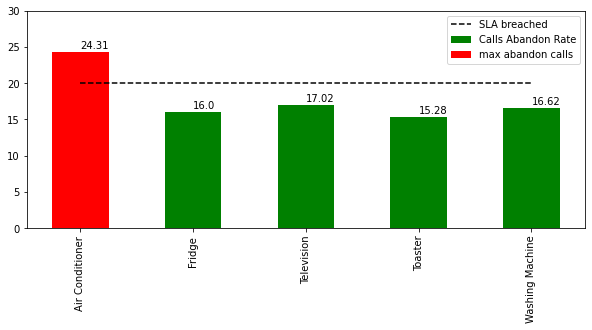

In [279]:
plt.rcParams['figure.figsize'][0] = 10
plt.bar(dt.index,dt['Missed_call_%'],label = "Calls Abandon Rate",color="green",width=.5)
plt.bar(np.argmax(dt['Missed_call_%']),dt['Missed_call_%'].max(),color="red",label="max abandon calls",width=.5)
plt.plot(dt.index,[20,20,20,20,20],"--",color="k",label = "SLA breached")
plt.legend(loc= 1)
plt.ylim(0,30)
plt.xticks(rotation=90)
for i in range(dt.shape[0]):
    plt.annotate(xy=[dt.index[i],dt['Missed_call_%'][i]+.5],s = round(dt['Missed_call_%'][i],2))
plt.show()

In [282]:
# satisfaction score by agent

In [283]:
df.head()

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Column1,Calls,Answered,resolved,Week,Day,Seconds
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,1,1,1,53,Friday,143.210
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,1,1,0,53,Friday,242.323
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False,1,1,1,53,Friday,131.202
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,False,1,1,1,53,Friday,37.481
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,False,1,1,1,53,Friday,60.083


In [286]:
sr = df.groupby("Agent")['Satisfaction rating'].mean()

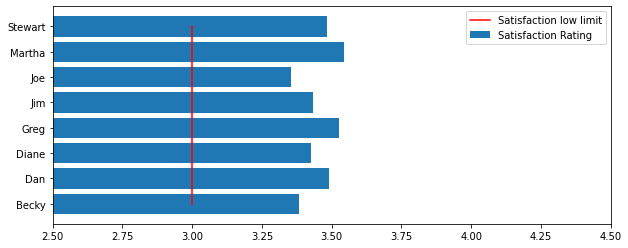

In [303]:
plt.barh(sr.index,sr.values,label="Satisfaction Rating")
plt.plot([3,3,3,3,3,3,3,3],sr.index,color="red",label="Satisfaction low limit")
plt.xlim(2.5,4.5)
plt.legend()
plt.show()

In [304]:
df.head()

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Column1,Calls,Answered,resolved,Week,Day,Seconds
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,1,1,1,53,Friday,143.210
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,1,1,0,53,Friday,242.323
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False,1,1,1,53,Friday,131.202
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,False,1,1,1,53,Friday,37.481
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,False,1,1,1,53,Friday,60.083
